## Lembar Jawaban Tugas Mandiri Pertemuan 12

Nama  : Erika Lety Istikhomah Puspita Sari

Kelas : TelU-005

# Tugas Mandiri Pertemuan 12
---
Pertemuan 12 (duabelas) pada Microcredential Associate Data Scientist 2021 menyampaikan materi mengenai MMembangun Model 3 (Regresi dengan Tree). silakan Anda kerjakan Latihan 1 s/d 10. Output yang anda lihat merupakan panduan yang dapat Anda ikuti dalam penulisan code :)

# About Iris dataset
![](https://www.oreilly.com/library/view/python-artificial-intelligence/9781789539462/assets/462dc4fa-fd62-4539-8599-ac80a441382c.png)


The iris dataset contains the following data **(Before Cleansing)**
* 50 samples of 3 different species of iris (150 samples total)
* Measurements: sepal length, sepal width, petal length, petal width
* The format for the data: (sepal length, sepal width, petal length, petal width)

### The variables are:
![](https://i.imgur.com/PQqYGaW.png)
* sepal_length: Sepal length, in centimeters, used as input.
* sepal_width: Sepal width, in centimeters, used as input.
* petal_length: Petal length, in centimeters, used as input.
* petal_width: Petal width, in centimeters, used as input.
* class: Iris Setosa, Versicolor, or Virginica, used as the target.

# Latihan (1)

### Melakukan import library yang dibutuhkan

In [11]:
# import library pandas
import pandas as pd

# Import library numpy
import numpy as np

# Import library matplotlib dan seaborn untuk visualisasi
from matplotlib import pyplot as plt
import seaborn as sns

# me-non aktifkan peringatan pada python
import warnings 
warnings.filterwarnings('ignore')

### Load Dataset

In [12]:
#Panggil file (load file bernama CarPrice_Assignment.csv) dan simpan dalam dataframe
dataset ='Iris_AfterClean.csv'
iris = pd.read_csv(dataset)

In [13]:
# tampilkan 5 baris data 
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.6,3.1,1.5,0.2,Iris-setosa
1,5.0,3.6,1.4,0.2,Iris-setosa
2,5.4,3.9,1.7,0.4,Iris-setosa
3,4.9,3.1,1.5,0.1,Iris-setosa
4,5.4,3.7,1.5,0.2,Iris-setosa


# Latihan (2)

### definisi variabel X(feature kolom) dan y(species/label):

In [14]:
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

## Label encoding
![](https://miro.medium.com/max/772/1*QQe-4476Oy3_dI1vhb3dDg.png)


Seperti yang kita lihat, label bersifat kategoris. KNeighborsClassifier tidak menerima label string. Kita perlu menggunakan LabelEncoder untuk mengubahnya menjadi angka. Iris-setosa sesuai dengan 0, Iris-versicolor sesuai dengan 1 dan Iris-virginica sesuai dengan 2.

# Latihan (3)

### transform label data species dengan menggunakan library LabelEncoder

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# 3. Building Machine Learning Models

# Latihan (4)

### import library dalam kebutuhan membangun model 

In [36]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report

# Import Library Confussion Matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score

# Import Library Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier

### Splitting The Data into Training And Testing Dataset
![](https://data-flair.training/blogs/wp-content/uploads/sites/2/2018/08/1-16.png)

Train/test split adalah salah satu metode yang dapat digunakan untuk mengevaluasi performa model machine learning. Metode evaluasi model ini membagi dataset menjadi dua bagian yakni bagian yang digunakan untuk training data dan untuk testing data dengan proporsi tertentu. Train data digunakan untuk fit model machine learning, sedangkan test data digunakan untuk mengevaluasi hasil fit model tersebut.

![image.png](attachment:image.png)


Python memiliki library yang dapat mengimplementasikan train/test split dengan mudah yaitu Scikit-Learn. Untuk menggunakannya, kita perlu mengimport Scikit-Learn terlebih dahulu, kemudian setelah itu kita dapat menggunakan fungsi train_test_split().

# Latihan (5)

### split data train dan test dengan function train_test_split() dengan train_size=0.7, test_size=0.3 dan random_state=0

In [28]:
#Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3,random_state= 0)

Sekarang kita akan melatih beberapa model Machine Learning dan membandingkan hasilnya. Perhatikan bahwa karena set data tidak memberikan label untuk set pengujiannya, kita perlu menggunakan prediksi pada set pelatihan untuk membandingkan algoritme satu sama lain.

### 3.1 Random Forest:

Random forest, seperti namanya, terdiri dari sejumlah besar pohon keputusan individu yang beroperasi sebagai ansambel. Setiap pohon individu di hutan acak mengeluarkan prediksi kelas dan kelas dengan suara terbanyak menjadi prediksi model kami.

Sejumlah besar model (pohon) yang relatif tidak berkorelasi yang beroperasi sebagai komite akan mengungguli model konstituen individu mana pun.

![](https://miro.medium.com/max/1170/1*58f1CZ8M4il0OZYg2oRN4w.png)

# Latihan (6)

### Bangun model Random Forest dan akurasi nya

In [33]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision =precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)

Confusion matrix for Random Forest
 [[12  0  0]
 [ 0 14  1]
 [ 0  2 13]]
accuracy_random_Forest : 0.929
precision_random_Forest : 0.929
recall_random_Forest : 0.929
f1-score_random_Forest : 0.929


# Latihan (7)

### Visualisasikan Nilai Confusion Matrix dari Model Random Forest

Text(0.5, 15.0, 'Predicted label')

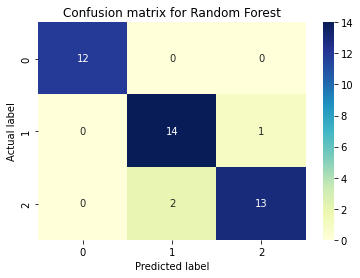

In [41]:
from sklearn import metrics
cnf_matrix= confusion_matrix(y_test, Y_prediction)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix for Random Forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 3.6 Decision Tree:

decision tree adalah struktur seperti diagram alur di mana setiap simpul internal mewakili pengujian pada fitur (misalnya apakah flip koin muncul kepala atau ekor), setiap simpul daun mewakili label kelas (keputusan diambil setelah menghitung semua fitur) dan cabang mewakili konjungsi fitur yang mengarah ke label kelas tersebut. Jalur dari akar ke daun mewakili aturan klasifikasi.

![](https://miro.medium.com/max/1000/1*LMoJmXCsQlciGTEyoSN39g.jpeg)

# Latihan (8)

### Bangun model DecisionTreeClassifier dan akurasi nya

In [42]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[12  0  0]
 [ 0 12  3]
 [ 0  2 13]]
accuracy_DecisionTree: 0.881
precision_DecisionTree: 0.881
recall_DecisionTree: 0.881
f1-score_DecisionTree : 0.881


# Latihan (9)

### Visualisasikan Nilai Confusion Matrix dari Model Decision Tree

Text(0.5, 15.0, 'Predicted label')

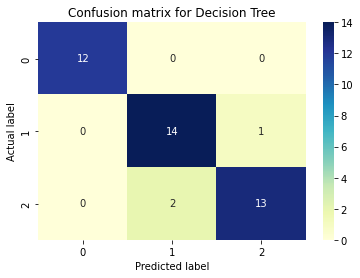

In [44]:
from sklearn import metrics
cdt_matrix= confusion_matrix(y_test, Y_prediction)
sns.heatmap(pd.DataFrame(cdt_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix for Decision Tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Latihan (10)

### Plot hasil model DecisionTreeClassifier dengan library plot_tree

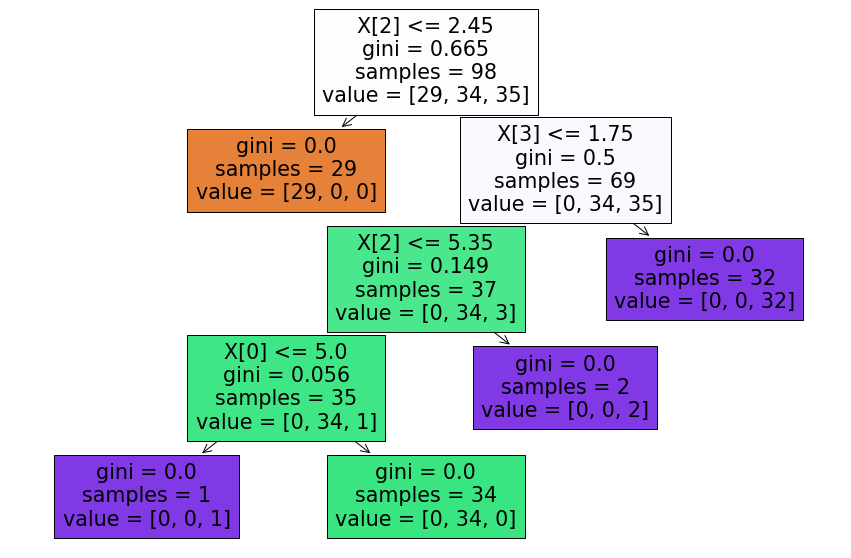

In [39]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree.fit(X_train, y_train) ,filled=True)
plt.show()